In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

## Customers

In [2]:
# Import du fichier customers

customers = pd.read_csv("customers.csv")      
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
# Voir la composition de customers

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


On voit qu'il n'y a aucunes valeurs manquantes

In [4]:
# Voir si les valeurs sont uniques

customers.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

On voit que les valeurs sont uniques

In [5]:
# Voir s'il y a des NaN

customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

On voit qu'il n'y a pas de NaN

In [6]:
# Voir s'il y a des données dupliquées

customers.duplicated().sum()

0

On voit qu'il n'y a aucunes valeurs manquantes

## Products

In [7]:
# Import du fichier Products

products = pd.read_csv("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [8]:
# Composition de Products 

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


On voit qu'il n'y a aucunes valeurs manquantes

In [9]:
# Voir si les valeurs sont uniques

products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

On voit que les valeurs sont uniques

In [10]:
# Voir s'il y a des valeurs dupliquées

products.duplicated().sum()

0

On voit qu'il n'y a aucunes valeurs en double

In [11]:
#Voir s'il y a des NaN

products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

On voit qu'il n'y a pas de NaN

## Transactions

In [12]:
transactions = pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


On voit qu'il n'y a aucunes valeurs manquantes

In [14]:
transactions.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

On voit que les valeurs sont uniques mais toutes ne le sont pas

In [15]:
#Confirmation qu'il n'y a pas de valeurs nulles, après l'aperçu dans info
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

On voit qu'il y a aucunes valeurs nulles

In [16]:
transactions.duplicated().sum()

126

On voit qu'il y a 126 valeurs en double

In [17]:
# On regarde qu'elles sont les valeurs en double
duplicate = transactions[transactions.duplicated()]
duplicate

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


On s'apercoit que toutes entrées ont la même date , la même heure et sont des test , surement faites par les developpeurs de l'équipe

In [18]:
# On supprime les valeurs dupliquées puisqu'elles ne sont pas utiles

transactions = transactions.drop_duplicates()
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [19]:
#On verifie qu'il n'y a plus de valeurs dupliquées

transactions.duplicated().sum()

0

In [20]:
transactions.value_counts()

id_prod  date                             session_id  client_id
0_0      2021-03-01 13:45:51.575117       s_282       c_5152       1
1_285    2021-07-18 09:48:19.014524       s_63899     c_7793       1
         2021-07-18 15:26:52.987797       s_64006     c_929        1
         2021-07-18 18:28:11.279593       s_64082     c_8356       1
         2021-07-19 22:07:41.376624       s_64567     c_3182       1
                                                                  ..
0_1486   2021-10-19 10:55:26.309106       s_107043    c_8574       1
         2021-10-19 19:40:46.255072       s_107217    c_8081       1
         2021-10-20 09:35:53.715307       s_107500    c_6820       1
         2021-10-21 16:10:11.944606       s_108097    c_459        1
T_0      test_2021-03-01 02:30:02.237450  s_0         ct_0         1
Length: 679406, dtype: int64

In [21]:
# Je regarde s'il reste des valeurs 'test'

transactions [transactions['date'].str.startswith('test')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


Il en reste 74, je dois les traiter

In [22]:
# traitement des test restant
transactions = transactions [~transactions['date'].str.startswith('test')]
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


Ce sont des valeurs qui ne sont pas utiles , on les enleve

In [23]:
# Jointure entre le df transactions et le df customers pour l'apparition de colonne _merge

transactions = transactions.merge(customers, on = 'client_id',how = "outer", indicator = True) 
transactions

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both
...,...,...,...,...,...,...,...
679350,NaN,NaN,NaN,c_7584,f,1960,right_only
679351,NaN,NaN,NaN,c_90,m,2001,right_only
679352,NaN,NaN,NaN,c_587,m,1993,right_only
679353,NaN,NaN,NaN,ct_1,m,2001,right_only


In [24]:
transactions.isna().sum()

id_prod       23
date          23
session_id    23
client_id      0
sex            0
birth          0
_merge         0
dtype: int64

Il y a des valeurs nulles mais toutes ne le sont pas

In [25]:
transactions["_merge"].value_counts()

both          679332
right_only        23
left_only          0
Name: _merge, dtype: int64

Je ne conserve que la valeur both , puisque left_only est égale à 0 et right_only n'est pas pertinente puisqu'elle concerne des client qui n'ont pas fait d'achat sur le site

In [26]:
# Df avec juste les valeurs both

transactions = transactions [transactions["_merge"] =="both"] 
transactions

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both
...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962,both
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998,both
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996,both
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,f,1996,both


In [27]:
#J'enlève les valeurs left only puisque égale à 0

transactions = transactions [~transactions['_merge'].str.startswith('left_only')]
transactions

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both
...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962,both
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998,both
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996,both
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,f,1996,both


In [28]:
# j'enlève les valeurs right_only

transactions = transactions [~transactions['_merge'].str.startswith('right_only')]
transactions

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both
...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962,both
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998,both
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996,both
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,f,1996,both


In [29]:
#Verification que les valeurs right_only et left_only sont bien enlevées

transactions["_merge"].value_counts()

both          679332
left_only          0
right_only         0
Name: _merge, dtype: int64

In [30]:
#J'enlève la colonne _merge, elle n'est plus utile

transactions = transactions.drop(columns="_merge")
transactions

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986
...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,f,1996


In [31]:
# Jointure entre le df transactions crée précedemment et le df products pour l'apparition de colonne _merge

transactions = transactions.merge(products, on = 'id_prod',how = "outer", indicator = True) 
transactions

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
679349,0_1624,NaN,NaN,NaN,NaN,NaN,24.50,0.0,right_only
679350,2_86,NaN,NaN,NaN,NaN,NaN,132.36,2.0,right_only
679351,0_299,NaN,NaN,NaN,NaN,NaN,22.99,0.0,right_only
679352,0_510,NaN,NaN,NaN,NaN,NaN,23.66,0.0,right_only


In [32]:
# recherche des valeurs nulles dans le nouveau df transactions

transactions.isna().sum()

id_prod         0
date           22
session_id     22
client_id      22
sex            22
birth          22
price         221
categ         221
_merge          0
dtype: int64

Il y a des valeurs nulles mais deux n'ont pas de valeurs nulles

In [33]:
# Nombre de valeurs dans la colonne _merge

transactions["_merge"].value_counts()

both          679111
left_only        221
right_only        22
Name: _merge, dtype: int64

In [34]:
#Aperçu de la colonne both

transactions[transactions["_merge"]== "both"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,both
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,both
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,both
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,both


In [35]:
#Aperçu de la colonne left_only

transactions[transactions["_merge"]== "left_only"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,NaN,left_only


Je vais enlever le produit id_prod 0_2245, il a été vendu 221 fois mais n'est pas présent dans l'inventaire, il n'a pas de prix ni de catégorie

In [36]:
#Aperçu de la colonne right_only

transactions[transactions["_merge"]== "right_only"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,NaN,NaN,1.67,0.0,right_only
679334,T_0,NaN,NaN,NaN,NaN,NaN,-1.00,0.0,right_only
679335,0_1062,NaN,NaN,NaN,NaN,NaN,20.08,0.0,right_only
679336,0_1119,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679337,0_1014,NaN,NaN,NaN,NaN,NaN,1.15,0.0,right_only
679338,1_0,NaN,NaN,NaN,NaN,NaN,31.82,1.0,right_only
679339,0_1318,NaN,NaN,NaN,NaN,NaN,20.92,0.0,right_only
679340,0_1800,NaN,NaN,NaN,NaN,NaN,22.05,0.0,right_only
679341,0_1645,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only


On ne va pas garder right_only parce qu'ils n'ont pas de date, ni de session_id, ni de client_id, ni de sex et pas non plus de birth, donc ne correspondent pas à des clients existants et réels

In [37]:
#Suppression des valeurs left_only

transactions = transactions [~transactions['_merge'].str.startswith('left_only')]
transactions

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
679349,0_1624,NaN,NaN,NaN,NaN,NaN,24.50,0.0,right_only
679350,2_86,NaN,NaN,NaN,NaN,NaN,132.36,2.0,right_only
679351,0_299,NaN,NaN,NaN,NaN,NaN,22.99,0.0,right_only
679352,0_510,NaN,NaN,NaN,NaN,NaN,23.66,0.0,right_only


In [38]:
#Suppression des valeurs right_only

transactions = transactions [~transactions['_merge'].str.startswith('right_only')]
transactions

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,both
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,both
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,both
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,both


In [39]:
#On verifie que les données ont bien était supprimées 

transactions['_merge'].value_counts()

both          679111
left_only          0
right_only         0
Name: _merge, dtype: int64

In [40]:
#On supprime la colonne _merge, elle n'est plus utile

transactions = transactions.drop(columns="_merge")
transactions

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0


## Analyse chiffre d'affaire

In [41]:
#Conversion des dates

In [42]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [43]:
transactions['dateymd'] = transactions["date"].dt.strftime("%y-%m-%d")

In [44]:
transactions['dateym'] = transactions["date"].dt.strftime("%y-%m")

In [45]:
transactions.groupby('dateym')['price'].sum()

dateym
21-03    482440.61
21-04    476109.30
21-05    492943.47
21-06    484088.56
21-07    482835.40
21-08    482284.79
21-09    507240.68
21-10    320798.74
21-11    516167.73
21-12    525917.28
22-01    525338.99
22-02    535571.50
22-03    515456.53
22-04    492998.94
22-05    517132.60
22-06    496016.12
22-07    510783.12
22-08    506467.27
22-09    494114.53
22-10    507917.77
22-11    496664.94
22-12    510219.50
23-01    517540.55
23-02    456679.76
Name: price, dtype: float64

In [46]:
ca_jour = transactions.groupby('dateymd')['price'].sum()
ca_jour

dateymd
21-03-01    16565.22
21-03-02    15486.45
21-03-03    15198.69
21-03-04    15196.07
21-03-05    17471.37
              ...   
23-02-24    15207.89
23-02-25    15761.25
23-02-26    16304.72
23-02-27    19170.81
23-02-28    18105.15
Name: price, Length: 730, dtype: float64

In [47]:
transactions.groupby('dateymd')['price'].sum().describe()

count      730.000000
mean     16237.984493
std       1847.906447
min       8076.040000
25%      15476.225000
50%      16223.305000
75%      17185.785000
max      20487.680000
Name: price, dtype: float64

La méthode .describe nous donne un résumé statistique basique de la colonne price de notre dataframe.

Il y a 730 données

La moyenne est à  16237.98€. On note qu'elle est différente de la médiane.

Nous avons aussi les premier et troisème percentiles ainsi que la médiane (second percentil, 50%) à 16223.30€.

L'ecart type est de 1847.90€

Le chiffre d'affaire minimum est à 8076.04 € et le CA maximum est à 20487.68€ , on s'aperçoit qu'il y a une large répartition du CA

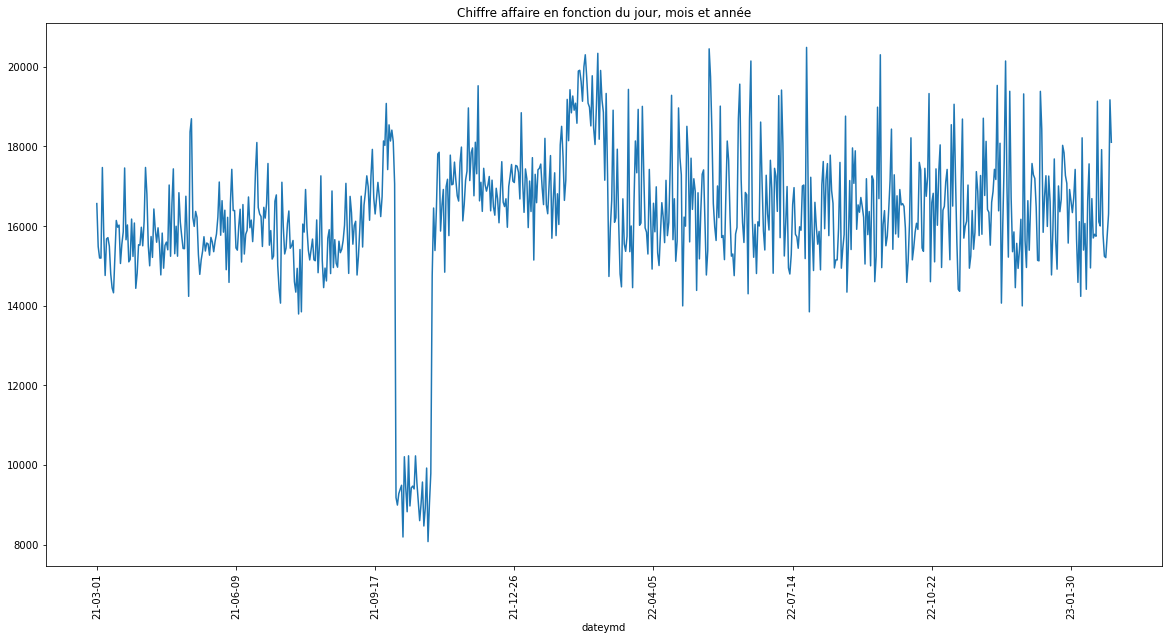

In [48]:
#Graphique du chiffre affaire en fonction du jour, mois et année

plt.figure(figsize=(20,10))
ca_jour.plot()
plt.title('Chiffre affaire en fonction du jour, mois et année')
plt.xticks(rotation = 90)
plt.show()

Il semble y avoir une baisse significative au mois d'octobre, mais il faut une analyse plus approfondie pour confirmer le mois et la baisse. 

In [49]:
ca_mois = transactions.groupby('dateym')['price'].sum()
ca_mois

dateym
21-03    482440.61
21-04    476109.30
21-05    492943.47
21-06    484088.56
21-07    482835.40
21-08    482284.79
21-09    507240.68
21-10    320798.74
21-11    516167.73
21-12    525917.28
22-01    525338.99
22-02    535571.50
22-03    515456.53
22-04    492998.94
22-05    517132.60
22-06    496016.12
22-07    510783.12
22-08    506467.27
22-09    494114.53
22-10    507917.77
22-11    496664.94
22-12    510219.50
23-01    517540.55
23-02    456679.76
Name: price, dtype: float64

On voit une baisse importante du chiffre d'affaires au mois d'octobre

dateym
21-03              NaN
21-04              NaN
21-05    483831.126667
21-06    484380.443333
21-07    486622.476667
21-08    483069.583333
21-09    490786.956667
21-10    436774.736667
21-11    448069.050000
21-12    454294.583333
22-01    522474.666667
22-02    528942.590000
22-03    525455.673333
22-04    514675.656667
22-05    508529.356667
22-06    502049.220000
22-07    507977.280000
22-08    504422.170000
22-09    503788.306667
22-10    502833.190000
22-11    499565.746667
22-12    504934.070000
23-01    508141.663333
23-02    494813.270000
Name: price, dtype: float64


Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire")

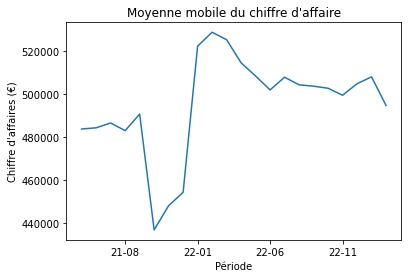

In [50]:
# Decomposition en moyenne mobile:
MovingAverage = ca_mois.rolling(3).mean()
print(MovingAverage)

# Graphique:
MovingAverage.plot()
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire")

In [51]:
transactions.groupby('dateym')['price'].sum().describe()

count        24.000000
mean     493905.361667
std       41208.740111
min      320798.740000
25%      483775.270000
50%      501566.105000
75%      515634.330000
max      535571.500000
Name: price, dtype: float64

L'ensemble des données est sur 24 mois , c'est a dire 2 ans 

La moyenne est de 493905.36€ de chiffre d'affaire. On note qu'elle est différente de la médiane.

Nous avons aussi les premier et troisème percentiles ainsi que la médiane (second percentil, 50%) à 501566.10€.

l'ecart type est de  41208.74€ 

Le chiffre d'affaire minimum est de 320798.74€ , ce qui correspond à notre mois d'octobre , le maximum est de 535571.50€. 

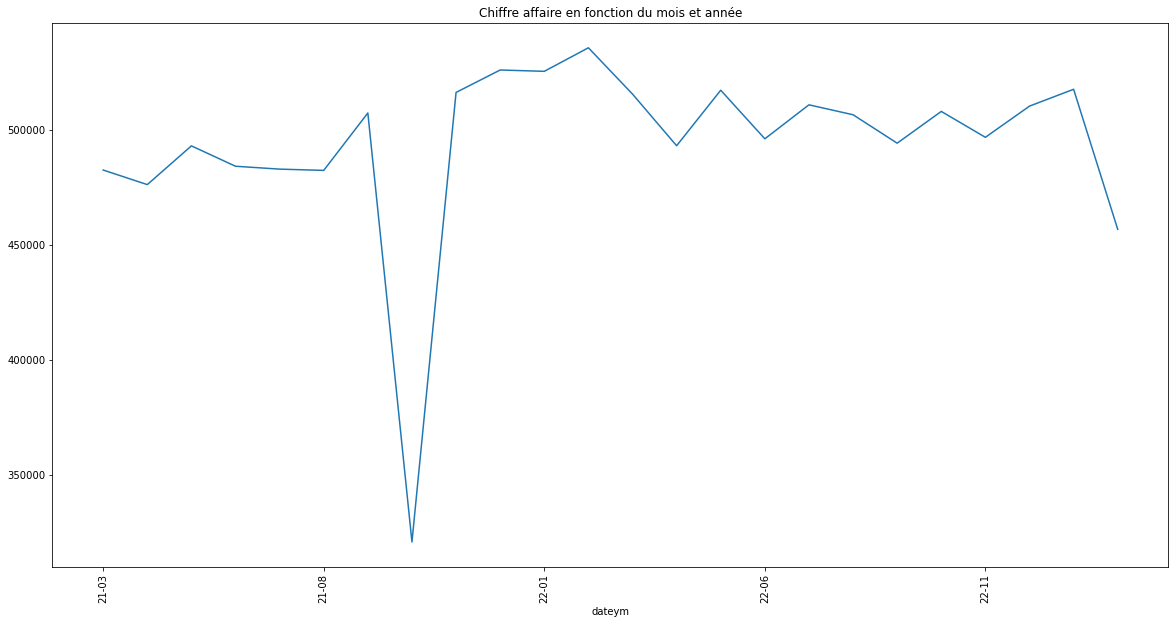

In [52]:
plt.figure(figsize=(20,10))
ca_mois.plot()
plt.title('Chiffre affaire en fonction du mois et année')
plt.xticks(rotation = 90)
plt.show()

In [53]:
#Restriction selon les dates du mois de septembre
transaction_september = len(transactions[(transactions.date > '2021-08-31') & \
                                                     (transactions.date < '2021-10-01')])
transaction_september

34136

In [54]:
#Restriction selon les dates du mois d'octobre
transaction_october = len(transactions[(transactions.date > '2021-09-30') & \
                                                   (transactions.date < '2021-11-01')])
transaction_october

22910

In [55]:
#Restriction selon les dates du mois de novembre
transaction_november = len(transactions[(transactions.date > '2021-10-31') & \
                                                     (transactions.date < '2021-12-01')])
transaction_november

29249

In [56]:
#Moyenne pour connaitre le ca théorique du mois octobre

prev_october = (transaction_september + transaction_november)/2
prev_october

31692.5

Il semble manque des valeurs sur le mois d'octobre, d'ou cela peut il provenir ? On verifie avec une restriction sur les catégories

In [57]:
#Restriction par catégorie pour identifier les valeurs manquantes sur le mois d'octobre
transactions[(transactions.categ == 0) & (transactions.date > '2021-10-02') & \
                                                   (transactions.date < '2021-10-28')]

,id_prod,date,session_id,client_id,sex,birth,price,categ,dateymd,dateym
6,0_1518,2021-10-23 21:58:50.700370,s_109153,c_6714,f,1968.0,4.18,0.0,21-10-23,21-10
27,0_1518,2021-10-13 18:00:08.691379,s_104281,c_1609,m,1980.0,4.18,0.0,21-10-13,21-10
31,0_1518,2021-10-18 05:08:38.451377,s_106465,c_1609,m,1980.0,4.18,0.0,21-10-18,21-10
75,0_1518,2021-10-06 02:28:00.146255,s_100641,c_6726,f,1974.0,4.18,0.0,21-10-06,21-10
98,0_1518,2021-10-12 07:31:49.081831,s_103594,c_846,f,1981.0,4.18,0.0,21-10-12,21-10
...,...,...,...,...,...,...,...,...,...,...
679176,0_1776,2021-10-04 21:13:09.706161,s_100046,c_2496,m,1958.0,21.16,0.0,21-10-04,21-10
679186,0_643,2021-10-17 00:47:44.028933,s_105868,c_7779,m,1983.0,0.99,0.0,21-10-17,21-10
679213,0_410,2021-10-23 19:04:21.253947,s_109088,c_1080,f,1969.0,25.23,0.0,21-10-23,21-10
679312,0_1735,2021-10-27 04:06:23.489895,s_110697,c_5216,m,1971.0,26.99,0.0,21-10-27,21-10


In [58]:
transactions[(transactions.categ == 1) & (transactions.date > '2021-10-02') & \
                                                   (transactions.date < '2021-10-28')]

,id_prod,date,session_id,client_id,sex,birth,price,categ,dateymd,dateym


Aucune transaction sur les produits de cat 1 pendant le mois d'octobre

In [59]:
transactions[(transactions.categ == 2) & (transactions.date > '2021-10-02') & \
                                                   (transactions.date < '2021-10-28')]

,id_prod,date,session_id,client_id,sex,birth,price,categ,dateymd,dateym
105636,2_101,2021-10-08 22:14:56.120386,s_101993,c_4958,m,1999.0,63.99,2.0,21-10-08,21-10
105646,2_101,2021-10-11 15:31:30.568377,s_103293,c_4958,m,1999.0,63.99,2.0,21-10-11,21-10
105741,2_101,2021-10-13 17:13:05.368356,s_104270,c_2009,m,1994.0,63.99,2.0,21-10-13,21-10
105791,2_101,2021-10-18 08:55:18.763313,s_106540,c_3198,f,2004.0,63.99,2.0,21-10-18,21-10
105796,2_101,2021-10-27 23:01:13.185216,s_111055,c_6515,m,2004.0,63.99,2.0,21-10-27,21-10
...,...,...,...,...,...,...,...,...,...,...
677790,2_67,2021-10-15 00:57:49.639425,s_104872,c_815,m,1946.0,32.99,2.0,21-10-15,21-10
677991,2_198,2021-10-24 10:46:09.647533,s_109408,c_6,f,2004.0,138.32,2.0,21-10-24,21-10
677993,2_198,2021-10-08 02:10:34.212812,s_101580,c_1946,m,1964.0,138.32,2.0,21-10-08,21-10
678118,2_50,2021-10-16 09:52:12.553406,s_105561,c_1907,m,1995.0,150.69,2.0,21-10-16,21-10


In [60]:
# dataframe excluant le mois d'octobre 
transactions =  transactions[(transactions.date <= '2021-09-30') | (transactions.date >= '2021-11-01')]

## Analyse des references

In [61]:
transactions.groupby('id_prod')['price'].sum()

id_prod
0_0        4470.00
0_1        5154.31
0_10        323.10
0_100        61.80
0_1000     2783.88
            ...   
2_95        395.96
2_96      27787.80
2_97       2092.87
2_98        149.74
2_99        594.93
Name: price, Length: 3263, dtype: float64

In [62]:
transactions.groupby('id_prod')['price'].sum().nlargest(10)

id_prod
2_159    92265.68
2_135    67403.23
2_112    62772.53
2_102    58962.58
2_209    55292.10
1_395    53863.42
1_369    53593.66
2_110    51854.25
1_414    51496.63
2_39     51089.19
Name: price, dtype: float64

In [63]:
transactions.groupby('id_prod')['price'].sum().nsmallest(10)

id_prod
0_1539    0.99
0_898     1.27
0_1284    1.38
0_1653    1.98
0_643     1.98
0_1601    1.99
0_541     1.99
0_807     1.99
0_1728    2.27
0_324     2.36
Name: price, dtype: float64

## Analyse des clients

In [64]:
transactions.groupby('client_id')['price'].sum().nlargest(15)

client_id
c_1609    312247.61
c_4958    282289.70
c_6714    149484.49
c_3454    111638.84
c_2899      5214.05
c_1570      5136.14
c_3263      5129.89
c_7319      5078.48
c_8026      4969.41
c_5263      4964.87
c_7421      4944.39
c_2140      4937.70
c_1422      4878.25
c_1876      4780.08
c_2595      4778.69
Name: price, dtype: float64

In [65]:
transactions.groupby('client_id')['price'].sum().nsmallest(15)

client_id
c_8140     8.30
c_8114     9.98
c_240     11.06
c_4648    11.20
c_2793    12.99
c_4478    13.36
c_5962    13.99
c_6040    15.72
c_5919    15.98
c_5829    16.07
c_8032    17.64
c_4976    17.89
c_2776    21.46
c_6022    21.98
c_6256    23.26
Name: price, dtype: float64

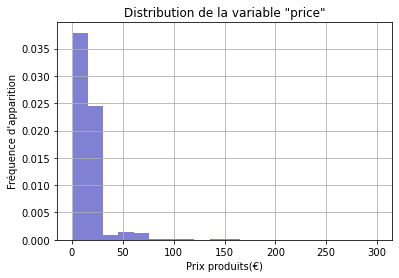

In [66]:
#Visualisation (Histogramme)de la distribution des prix produits
transactions ['price'].hist(color='#0504aa', alpha=0.5, density=True, bins=20)

plt.title('Distribution de la variable "price"')
plt.xlabel('Prix produits(€)')
plt.ylabel('Fréquence d\'apparition')
plt.show()

In [67]:
transactions.groupby('client_id')['price'].sum()

client_id
c_1        550.19
c_10      1353.60
c_100      254.85
c_1000    2209.92
c_1001    1711.95
           ...   
c_995      189.41
c_996     1611.59
c_997     1432.02
c_998     2779.88
c_999      681.43
Name: price, Length: 8598, dtype: float64

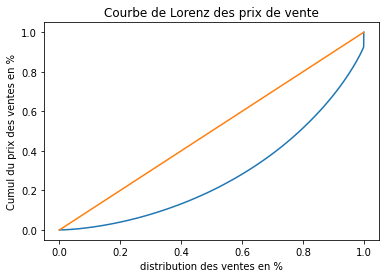

In [68]:
#La courbe de Lorenz permet de représenter la répartition d'une variable au sein d'une population, notamment si elle est égalitaire ou non.
lorenzprixclient = transactions.groupby('client_id')['price'].sum().values
n = len(lorenzprixclient)
lorenz = np.cumsum(np.sort(lorenzprixclient)) / lorenzprixclient.sum() #cumsum somme cumulée # /.sum , on divise pour que la courbe soit à 1
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) # pour que les abscisses celles-ci s'étendent de 0 à 1
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.xlabel('distribution des ventes en %')
plt.ylabel('Cumul du prix des ventes en %')
plt.title ('Courbe de Lorenz des prix de vente')
plt.show()

On remarque que 50% du montant des ventes represente 80% des ventes , l'inflechissement en fin de droite à 1% represente les articles au prix très elevés vu plus haut.

In [69]:
# On calcule l'indice de Gini qui resume la courbe de Lorenz mais de facon chiffrée ce qui est plus parlant 

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # s = surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini
print("L'indice de gini est de", gini)

L'indice de gini est de 0.4473865338869849


## Analyse sectorielle de l'activité de la variable catégorie

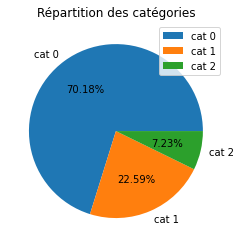

In [70]:
#Représentation des effectifs par catégories de vente
effectif = transactions.groupby('categ')['id_prod'].nunique()

plt.title('Répartition des catégories')
plt.pie(effectif,labels = ['cat 0','cat 1','cat 2'],autopct='%.2f%%')
plt.legend()
plt.show()

## Etude variable age

In [71]:
#Ajout d'une colonne'age' pour faciliter l'analyse
transactions['age'] = 2022 - transactions.birth

<ipython-input-71-d363d0458914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['age'] = 2022 - transactions.birth


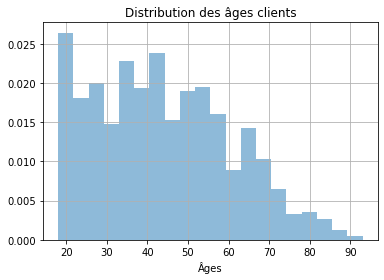

In [72]:
#Visualisation (Histogramme)de la distribution de l'âge clients
transactions.drop_duplicates(subset = 'client_id')['age'].hist(density=True, alpha=0.5, bins=20)

plt.xlabel('Âges')
plt.title('Distribution des âges clients')
plt.show()

On voit ici que l'age miminimum est 18ans et maximum 95ans.

Il y a autant de personnes de 18ans peut etre parce que l'âge minimum pour s'incrire est de 18ans.

## Etude variable Sexe

In [73]:
transactions["sex"].value_counts()

m    329031
f    327170
Name: sex, dtype: int64

Tous les clients identifiés comme M ou F, mais il y a dedans les clients comptés plusieurs fois puisque c'est tous les achats

In [74]:
transactions.drop_duplicates(subset = 'client_id')["sex"].value_counts()

f    4477
m    4121
Name: sex, dtype: int64

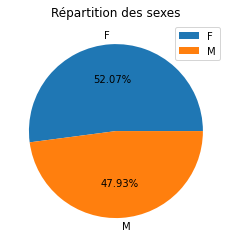

In [75]:
plt.title('Répartition des sexes')
plt.pie(transactions.drop_duplicates(subset = 'client_id')["sex"].value_counts(),labels = ['F','M'], autopct='%.2f%%')
plt.legend()
plt.show()

In [76]:
bins = pd.IntervalIndex.from_tuples([(18, 25), (25, 35), (35, 45),(45, 55), (55, 65), (65,75), (75, 85), (85, 95) ])
transactions['agebins']= pd.cut(transactions['age'], bins = bins).astype(str)
transactions

<ipython-input-76-ead69402390b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['agebins']= pd.cut(transactions['age'], bins = bins).astype(str)


,id_prod,date,session_id,client_id,sex,birth,price,categ,dateymd,dateym,age,agebins
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,22-05-20,22-05,36.0,"(35, 45]"
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,21-07-20,21-07,36.0,"(35, 45]"
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,22-08-20,22-08,36.0,"(35, 45]"
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,21-05-09,21-05,54.0,"(45, 55]"
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,22-05-30,22-05,54.0,"(45, 55]"
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,23-01-26,23-01,77.0,"(75, 85]"
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,22-11-26,22-11,77.0,"(75, 85]"
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,21-09-26,21-09,77.0,"(75, 85]"
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,22-02-19,22-02,29.0,"(25, 35]"


## Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ? 

#### Variables qualitatives :

Les id (client_id, id_prod, session_id), 
Les dates de transactions,
Le sexe des clients (f ou m),
Les catégories produits (0, 1 ou 2)

#### Variable quantitatives : 


Le montant total des achats,
La frequence d'achat,
La taille du panier moyen, 
L'âge

In [77]:
transactions.groupby('client_id')['price'].sum().nlargest(15)

client_id
c_1609    312247.61
c_4958    282289.70
c_6714    149484.49
c_3454    111638.84
c_2899      5214.05
c_1570      5136.14
c_3263      5129.89
c_7319      5078.48
c_8026      4969.41
c_5263      4964.87
c_7421      4944.39
c_2140      4937.70
c_1422      4878.25
c_1876      4780.08
c_2595      4778.69
Name: price, dtype: float64

In [78]:
transactions= transactions[~transactions['client_id'].isin(['c_1609','c_4958','c_6714','c_3454'])]

On met de côté les 4 gros montants pour ne pas fausser les resultats des analyses suivantes.

## Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

sexe et categorie = quali quali


On pose les hypothèses : 

H0 : Il n'y a pas corrélation entre les variables

H1 : Il y a une relation entre les variables

In [79]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611191 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     611191 non-null  object        
 1   date        611191 non-null  datetime64[ns]
 2   session_id  611191 non-null  object        
 3   client_id   611191 non-null  object        
 4   sex         611191 non-null  object        
 5   birth       611191 non-null  float64       
 6   price       611191 non-null  float64       
 7   categ       611191 non-null  float64       
 8   dateymd     611191 non-null  object        
 9   dateym      611191 non-null  object        
 10  age         611191 non-null  float64       
 11  agebins     596441 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 60.6+ MB


In [80]:
#Creation tableau contigence
X = "sex"
Y = "categ"

cont = transactions[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,191478,110398,16419,318295
m,177495,100056,15345,292896
Total,368973,210454,31764,611191


On voit ici que la catégorie la plus achetée par les hommes et les femmes est la catégorie 0 

### frequence marginale

In [81]:
cont.loc['Total',:]

categ
0.0      368973
1.0      210454
2.0       31764
Total    611191
Name: Total, dtype: int64

In [82]:
cont/cont.loc['Total',:]

categ,0.0,1.0,2.0,Total
sex,,,,
f,0.518949,0.524571,0.516906,0.520778
m,0.481051,0.475429,0.483094,0.479222
Total,1.000000,1.000000,1.000000,1.000000


La frequence marginale des catégories en fonction du sexe, on voit que les femmes achetent plus dans la catégorie 0 et les hommes dans la catégorie 2.

In [83]:
cont.loc[:,'Total']

sex
f        318295
m        292896
Total    611191
Name: Total, dtype: int64

In [84]:
cont.T/cont.loc[:,'Total']

sex,f,m,Total
categ,,,
0.0,0.601574,0.606000,0.603695
1.0,0.346842,0.341609,0.344334
2.0,0.051584,0.052391,0.051971
Total,1.000000,1.000000,1.000000


La fréquence marginale du sexe en fonction des catégories, nous montre que les hommes et les femmes achetent le plus dans la catégorie 0, ce qui reprends le resultat vu dans le tableau de contingence.

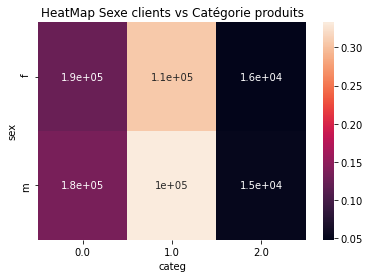

In [85]:
#afficher une heatmap pour faire une difference entre les deux variables
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(transactions)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('HeatMap Sexe clients vs Catégorie produits')
plt.show()
#foncé quand la mesure est grande, clair quand elle est proche de 0

heatmap , test du Chi2 pour voir l'independance des deux variables, c'est une quantification d'écart à l'indépendance.
Ce test confirme les resultats vus plus haut.

le chi2 ne suffit pas à confirmer les hypothèses, il faut calculer la p-value pour cela

In [86]:
#Calcul de la p-value 
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(18.986521901965496, 6, 0.004186456103190957)

pvalue est égale à environ 4,18 %, on admet généralement un seuil de significativité de 5% , notre resultat est bien en dessous , on peut donc dire qu'il y a une correlation entre le sexe et la catégorie des produits, ce qui confirme notre H1.

## Y a-t-il une corrélation entre l'âge des clients et le montant total des achats?

age et montant = quanti quanti sauf si l'age on le met par categorie (tranche d'age)

On pose les hypothèses : 

H0 : Il n'y a pas corrélation entre les variables

H1 : Il y a une relation entre les variables

In [87]:
#Agrégation pour somme les ventes 'price' (produits achetés) en fonction de l'âge des clients et des clients
#Création d'une variable 'age_price'
age_price = transactions.groupby(['client_id','age'])['price'].sum().reset_index()
age_price.head()

,client_id,age,price
0,c_1,67.0,550.19
1,c_10,66.0,1353.60
2,c_100,30.0,254.85
3,c_1000,56.0,2209.92
4,c_1001,40.0,1711.95


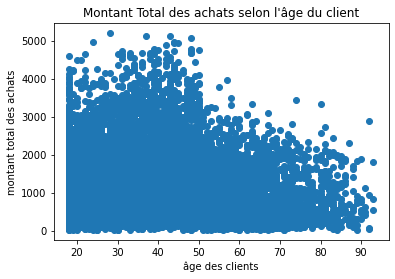

In [88]:
plt.plot(age_price["age"],age_price["price"],'o')
plt.xlabel("âge des clients")
plt.ylabel("montant total des achats")
plt.title('Montant Total des achats selon l\'âge du client')
plt.show()

Le montant total des achats varie en fonction de l'age des clients mais l'on peut pas dire que plus l'age est avancé moins le montant des achats est important

In [89]:
#Test normalité
st.shapiro(age_price.age)

C:\Users\Juliette\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9697239398956299, pvalue=4.617258821771772e-39)

Pvalue en dessous de 5%, rejet de h0

Etant donné l'avertissement j'ai voulu essayé une autre méthode avec anderson

In [90]:
st.anderson(age_price.age, dist = 'norm')

AndersonResult(statistic=53.76121903897183, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

le resultat est au dessus de la valeur critique de 5%, rejet de h0
La variable ne suit pas une distribution normale 

In [91]:
#Pour calculer le test de Pearson et la covariance pour voir la corrélation entre les deux variables
print(st.pearsonr(age_price["age"],age_price["price"])[0])
print(np.cov(age_price["age"],age_price["price"],ddof=0)[1,0])

-0.1840898673778207
-2892.4655441469195


Pearson doit se situer en 1 et-1, ici il est négatif , il nous permet de confirmer avec la covariance que le montant total des achats varie en fonction de l'âge, il y a donc correlation des variables mais l'on ne peut pas dire que l'age joue sur l'importance du montant depensé. Cela confirme notre H1.


In [92]:
# coefficient de Pearson au carré
print(st.pearsonr(age_price["age"],age_price["price"])[0]**2)

0.03388907927118362


Le coefficient au carré est egal à 3%,  cela confirme bien notre observation précédente.

## Y a-t-il une corrélation entre l'âge des clients et La fréquence d’achat  ?

age et freq = quanti quanti

On pose les hypothèses : 

H0 : Il n'y a pas corrélation entre les variables

H1 : Il y a une relation entre les variables

In [93]:
#Rappel du df transactions 

transactions.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,dateymd,dateym,age,agebins
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,22-05-20,22-05,36.0,"(35, 45]"
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,21-07-20,21-07,36.0,"(35, 45]"
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,22-08-20,22-08,36.0,"(35, 45]"
12,0_1518,2022-05-27 12:41:28.779302,s_214775,c_7456,f,1985.0,4.18,0.0,22-05-27,22-05,37.0,"(35, 45]"
13,0_1518,2021-11-27 12:41:28.779302,s_125853,c_7456,f,1985.0,4.18,0.0,21-11-27,21-11,37.0,"(35, 45]"


In [94]:
#Agrégation des données selon l'âge client
#Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
#Hypothèse 1 session_id = 1 transation
customers_freq = transactions.groupby(['client_id','age'])['session_id'].count().reset_index()

#Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['session_id'] / 12
customers_freq.sort_values(by='age', ascending=False).head(10)

,client_id,age,session_id,f
5284,c_577,93.0,113,9.416667
8157,c_8362,93.0,49,4.083333
4766,c_5302,93.0,37,3.083333
4075,c_4679,92.0,4,0.333333
2462,c_3218,92.0,6,0.500000
2804,c_353,92.0,51,4.250000
6905,c_7232,92.0,161,13.416667
4224,c_4812,91.0,71,5.916667
3524,c_418,91.0,24,2.000000
3696,c_4334,91.0,46,3.833333


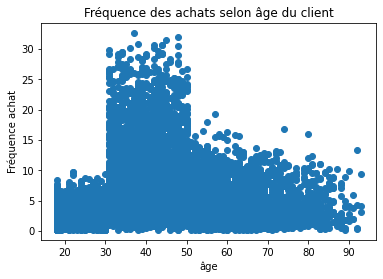

In [95]:
plt.plot(customers_freq.age, customers_freq.f, 'o')
plt.xlabel('âge')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon âge du client')
plt.show()

In [96]:
#Test normalité
st.shapiro(customers_freq.age)

C:\Users\Juliette\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9697239398956299, pvalue=4.617258821771772e-39)

La pvalue se situe en dessous de 5%, il n'y a pas independance des variables, rejet de H0.

In [97]:
st.anderson(customers_freq.age, dist = 'norm')

AndersonResult(statistic=53.76121903897183, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

le resultat est au dessus de la valeur critique de 5%, rejet de h0
La variable ne suit pas une distribution normale

In [98]:
# coefficient de Pearson et la covariance
print(st.pearsonr(customers_freq['age'],customers_freq['f'])[0])
print(np.cov(customers_freq["age"],customers_freq["f"],ddof=0)[1,0])

0.0328799895074796
3.031557736691203


Il existe une correlation entre la fréquence d'achat et l'âge mais elle semble exister par groupe d'âge, cela confirme notre h1

## Analyse de la corrélation entre l'âge clients et la taille du panier moyen

quanti quanti

In [99]:
transactions.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,dateymd,dateym,age,agebins
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,22-05-20,22-05,36.0,"(35, 45]"
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,21-07-20,21-07,36.0,"(35, 45]"
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,22-08-20,22-08,36.0,"(35, 45]"
12,0_1518,2022-05-27 12:41:28.779302,s_214775,c_7456,f,1985.0,4.18,0.0,22-05-27,22-05,37.0,"(35, 45]"
13,0_1518,2021-11-27 12:41:28.779302,s_125853,c_7456,f,1985.0,4.18,0.0,21-11-27,21-11,37.0,"(35, 45]"


In [100]:
# agrégation selon l'age client en moyenne de produits achetés 
customers = transactions.groupby(['age','client_id', 'session_id'])['id_prod'].count().reset_index()
customers.head() 

,age,client_id,session_id,id_prod
0,18.0,c_1042,s_153184,3
1,18.0,c_1042,s_169156,1
2,18.0,c_1042,s_183109,1
3,18.0,c_1042,s_272184,1
4,18.0,c_1042,s_317115,1


In [101]:
customers = customers.groupby(['age','client_id'])['id_prod'].mean().reset_index()
customers.head()

,age,client_id,id_prod
0,18.0,c_1042,1.500000
1,18.0,c_1046,2.785714
2,18.0,c_1065,1.368421
3,18.0,c_1088,1.181818
4,18.0,c_109,1.400000


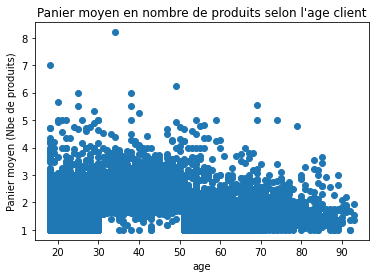

In [102]:
#Visualisation avec un nuage de point (âge client vs taille panier moyen)
plt.plot(customers['age'], customers['id_prod'], 'o')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')
plt.show()

on voit que ce n'est pas très significatif même si l'on aperçoit un creux entre 30 et 50ans 

In [103]:
#Test normalité
st.shapiro(customers.age)

C:\Users\Juliette\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9697239398956299, pvalue=4.617258821771772e-39)

In [104]:
st.anderson(customers.age, dist = 'norm')

AndersonResult(statistic=53.76121903895182, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

le resultat est au dessus de la valeur critique de 5%, rejet de h0
La variable ne suit pas une distribution normale

In [105]:
# coefficient de Pearson et la covariance
print(st.pearsonr(customers['age'],customers['id_prod'])[0])
print(np.cov(customers["age"],customers["id_prod"],ddof=0)[1,0])

-0.2073199561447297
-2.375178754705033


Pearson doit se situer entre 1 et -1 pour affimer l'indépendance des variables et valider notre hypothèse H0, ici il est de -0,207 ce n'est pas suffisant, on peut alors dire que nos variables sont corrélées et l'hypothèse 1 se verifie mais le graphique n'est pas très significatif.

On va regarder par tranches d'âge pour avoir une vision plus elargie .

In [106]:
customers = transactions.groupby(['agebins','client_id', 'session_id'])['id_prod'].count().reset_index()
customers.head() 

,agebins,client_id,session_id,id_prod
0,"(18, 25]",c_101,s_132887,1
1,"(18, 25]",c_101,s_147349,1
2,"(18, 25]",c_101,s_156526,2
3,"(18, 25]",c_101,s_222270,1
4,"(18, 25]",c_101,s_259837,2


In [107]:
customers = customers.groupby(['agebins','client_id'])['id_prod'].mean().reset_index()
customers.head()

,agebins,client_id,id_prod
0,"(18, 25]",c_101,2.000000
1,"(18, 25]",c_1011,3.619048
2,"(18, 25]",c_1021,1.000000
3,"(18, 25]",c_1023,1.658537
4,"(18, 25]",c_1026,1.562500


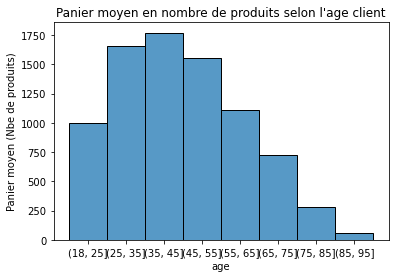

In [108]:
#Visualisation avec scatterplot selon les groupes d'individus identifiés
sns.histplot(customers.agebins)


plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.show()

In [109]:
# Lien entre l'age et la taille du panier:
nbr_achats_age = transactions.groupby(["age"])["session_id"].count()

# Correlation :
print("Corrélation de Spearman:", st.spearmanr(nbr_achats_age.index,nbr_achats_age.values))

Corrélation de Spearman: SpearmanrResult(correlation=-0.6737935748462065, pvalue=2.5520940213877932e-11)


La pvalue étant inferieure à 5%, on ne peut pas declarer l'indépendance des variables, on rejette HO au profit de H1 puisque les variables sont corrélées,une correlation entre nombre produit et âge client mais par groupe plus que ensemble.

## Y a-t-il une corrélation entre l'âge des clients et Les catégories de produits achetés.

quanti quali

On pose les hypothèses : 

H0 : Il n'y a pas corrélation entre les variables

H1 : Il y a une relation entre les variables

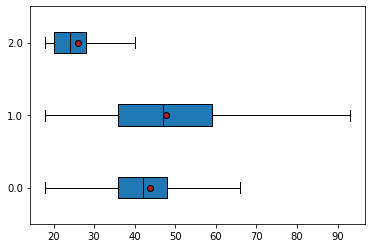

In [110]:
X = "categ" # qualitative
Y = "age" # quantitative
modalites = transactions[X].unique()
groupes = []
for m in modalites:
    groupes.append(transactions[transactions[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs et le trait noir, la mediane. 

In [111]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    

In [112]:
eta_squared(transactions[X],transactions[Y])

0.11326222946705358

L'éta carré sert à evaluer la corrélation de facon numerique , il doit se situer entre 0 et 1 pour confirmer la correlation, ici il est de 0,113. 

Donne une correlation surtout grâce à la catégorie 2, confirme notre hypothèse 1